In [1]:
from collections import Counter
import jieba
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, '../modules/')

from fintextmin import *  # 使用 modules 中的 fintextmin 模組

In [2]:
text_list = read_text_folder("./datasample/")
print("document number:", len(text_list))

document number: 3


In [3]:
def add_word(list):
    for items in list:
        jieba.add_word(items)

add_word(['太平山頂','纜車','凌霄閣','杜莎夫人蠟像館','阿甘蝦餐廳','維多利亞港','幻彩詠香江','張寶仔號','星光大道','迪士尼樂園','海洋公園','廟街夜市','男人街','周星馳','食神','旺角女人街','波鞋街','金魚街','西洋菜南街','昂坪360','昂坪 360','纜車','昂坪市集','天壇大佛','水晶車','大澳','大嶼山','蘭桂坊','中環半山扶手電梯','重慶森林','王菲','石板街','砵典乍街','色戒','十月圍城','無間道','龍鳳鬥','泰昌餅家','蘭芳園','絲襪奶茶','中環','嘉咸街壁畫','壁畫','甄子丹','劉德華','追龍','功夫','九龍城寨','塗鴉藝術','天際100','天際 100','灣仔','金紫荊廣場','時代廣場','鵝頸橋','跑馬','地馬場','尖沙咀','1881 Heritage','1881Heritage','半島酒店','海港城','女人街','朗豪街','旺角','東湧','東薈城','怪獸大廈','春秧街市場','春秧街','鴨寮街','美荷樓','黃大仙祠','彩虹邨','大澳漁村','南丫島','赤柱市集','美利樓','鴨靈號','澳門','九龍','奶油豬仔包','花園街','流沙包','炭烤燒肉','太平山夜景','觀景台','阿甘蝦','豬扒包','生煎包','大館','檀島咖啡','甘牌燒鵝','宜必思酒店','蓮香居','港幣','來回機票','電子港簽','台胞證','中環','銅鑼灣','新界','叮叮車','上環','金鐘','灣仔','天后','的士','八達通卡','油麻地','九龍尖沙咀','紅勘','李嘉欣','The One百貨','TheOne百貨','the one百貨','theone百貨','K11商場','龍城大藥房','翠華餐廳','至潮魚蛋','太子','雞仔餅','紅豆燒餅','奇趣餅家','冰火菠蘿油','金華冰廳','燒汁釀茄子','菠蘿油','鴨肉火肉飯','太平山','阿甘正傳','郭富城','阿甘蝦美式餐廳','沾仔記雲吞麵','海山樓','192層蛋塔','近郊','巧克力博物館','黃竹坑站','食神','禮頓道站','跑馬地總站','西港城','生記粥品','新記車仔麵','鵝頸橋打小人','沙田賽馬場','黃大仙','黃大仙廟','深水埗站','深水埗','天星小輪','天星碼頭','欣澳站','迪士尼','赤柱','西貢','地質公園','全記海鮮','松記車仔麵','長洲','張保仔洞','興樂菜館','新照記魚丸','超人氣','香港旅遊發展局','旅遊發展局','網路','熱搜','精選','分享文','選出','自由行','彙整'])

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Minerva\AppData\Local\Temp\jieba.cache
Loading model cost 0.712 seconds.
Prefix dict has been built succesfully.


In [4]:
doc_names = range(len(text_list))
dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}

In [5]:
stopwords = ['的', '是', '在', '有', '就', '獲', '不' , '會', '若', '而', '這', '該', 'ETtoday', '被' , '那個' , '...' ,'klook','Klook','kkday','Kkday','大','便宜','票券','票價','門票','推薦','地圖','啊','吧','大概','好像','忘記','香港','文章','波比','那些','攻略','答案','這些','或許','要馬','了','啦','還有','哪裡','哪些','大概','或者','根據','都','整理','PDF','超人氣','哪','旅遊景點','景點','旅遊','發展','諸多','程度','排名','熱搜','一定','以及','亦','以','與','精選','分享文','選出','必去','必買','買','搶先','最','更','自由行','附上','所有','去','到','抵達','玩','出來','行程','比價','安排','大家','優惠','事項','搶','方便','這份','拿','一次','一起','趕緊','彙整','百萬','我們','省錢'] 
dwc = count_words_in_documents(doc_list = text_list,
                              doc_names = range(len(text_list)),
                              stopwords = stopwords)

In [6]:
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
list(doc_word_frequency[0].items())[0:10] # 顯示第一篇文章的部份詞彙與對應詞頻


[('香港旅遊發展局', 2),
 ('網路', 1),
 ('地鐵資訊', 1),
 ('趕緊', 2),
 ('著', 1),
 ('彙', 1),
 ('整含', 1),
 ('私房', 2),
 ('一起', 2),
 ('瘋制', 1)]

In [7]:
## [原生 python 寫法] 
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
wfm = pd.concat(dwf_list, axis= 1)
wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()

puncs = set_puncs() # 因為一開始沒有清除標點符號,這邊回過頭來將它們自矩陣移除
wfm = wfm[list(set(wfm) - set(puncs))]
wfm # 詞頻矩陣完成

## [使用 fintextmin 寫法]
# wfm = create_word_frequency_matrix(dwc)

C:\Users\Minerva\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,工具,沒吃過,Day2,曲奇,地必,網友激,省錢,送,百萬,我們,...,No.5,超熱門,燈光秀,人務必,特別,就是,誤餐費,大嶼山,夜景,無時
0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,...,1.0,2.0,1.0,1.0,1.0,0.0,0.0,6.0,2.0,0.0
1,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,...,0.0,0.0,0.0,0.0,3.0,4.0,1.0,0.0,0.0,0.0


In [8]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator
df_tfidf = pd.DataFrame(tfidf_gen.toarray(), columns=wfm.columns)
df_tfidf

## [使用 fintextmin 寫法]
# df_tfidf = evaluate_tfidf(wfm)

,工具,沒吃過,Day2,曲奇,地必,網友激,省錢,送,百萬,我們,...,No.5,超熱門,燈光秀,人務必,特別,就是,誤餐費,大嶼山,夜景,無時
0,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.036551,0.00000,0.02403,0.000000,...,0.018275,0.04806,0.02403,0.02403,0.018275,0.000000,0.000000,0.109653,0.04806,0.00000
1,0.03238,0.01619,0.03238,0.024626,0.01619,0.01619,0.012313,0.01619,0.00000,0.000000,...,0.012313,0.00000,0.00000,0.00000,0.000000,0.036939,0.000000,0.012313,0.00000,0.01619
2,0.00000,0.00000,0.00000,0.015952,0.00000,0.00000,0.000000,0.00000,0.00000,0.272667,...,0.000000,0.00000,0.00000,0.00000,0.047855,0.063806,0.020974,0.000000,0.00000,0.00000


In [9]:
first_text = wfm.to_dict(orient='records')[0] # 將詞頻矩陣轉換成dictionary型別, 把第一篇文章抽出來
list(first_text.items())[0:10] # 檢視一下轉換結果

[('工具', 0.0),
 ('沒吃過', 0.0),
 ('Day2', 0.0),
 ('曲奇', 0.0),
 ('地必', 0.0),
 ('網友激', 0.0),
 ('省錢', 2.0),
 ('送', 0.0),
 ('百萬', 1.0),
 ('我們', 0.0)]

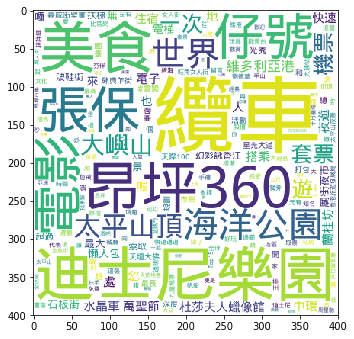

In [10]:
linux_font = r'/Users/Minerva/Documents/GitHub_table_computer/in_home/wqy-microhei.ttc'
#記得自行需要下載，與修改路徑 
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
plot_wordcloud(first_text, ax=ax1, font_path=linux_font, height=450, width=450)



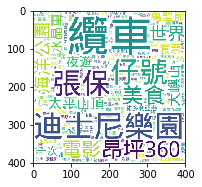

In [11]:
plt.figure(figsize=(12, 6))
ax2 = plt.subplot(122)
plot_tfidf_wordcloud(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, height=450, width=450)

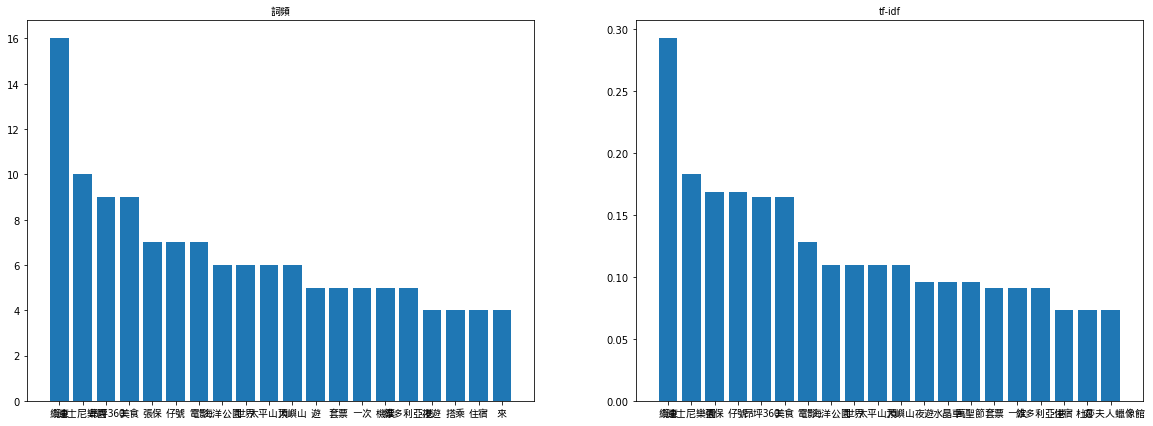

In [12]:
plt.figure(figsize=(20, 7))
ax1 = plt.subplot(121)
plot_tf_bar(first_text, ax=ax1, font_path=linux_font, title="詞頻")

ax2 = plt.subplot(122)
plot_tfidf_bar(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, title="tf-idf")

